In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n, m = 100, 50

# American put option

C:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:69: RuntimeWarning: divide by zero encountered in divide
  d1 = (
100%|██████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 129.85it/s]


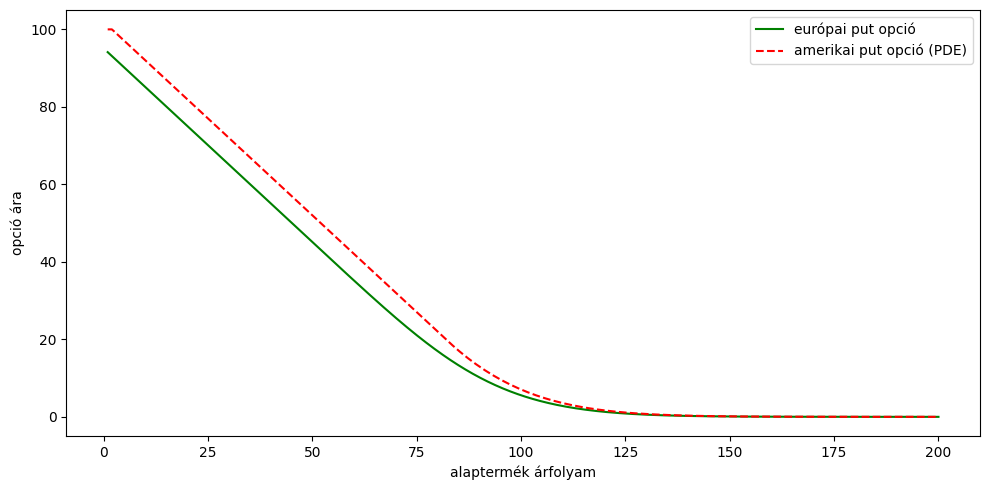

In [4]:
from pricer.analytical import BlackScholesPut
from pricer.pde_solver import AmericanBlackScholesPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma
)

price_analytical = BlackScholesPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma
)

price_pde_cls = AmericanBlackScholesPutPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="európai put opció", color="green")
ax.plot(analytical_config.underlier_price, price_pde, label="amerikai put opció (PDE)", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American up-and-out barrier call option

100%|████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 15351.13it/s]


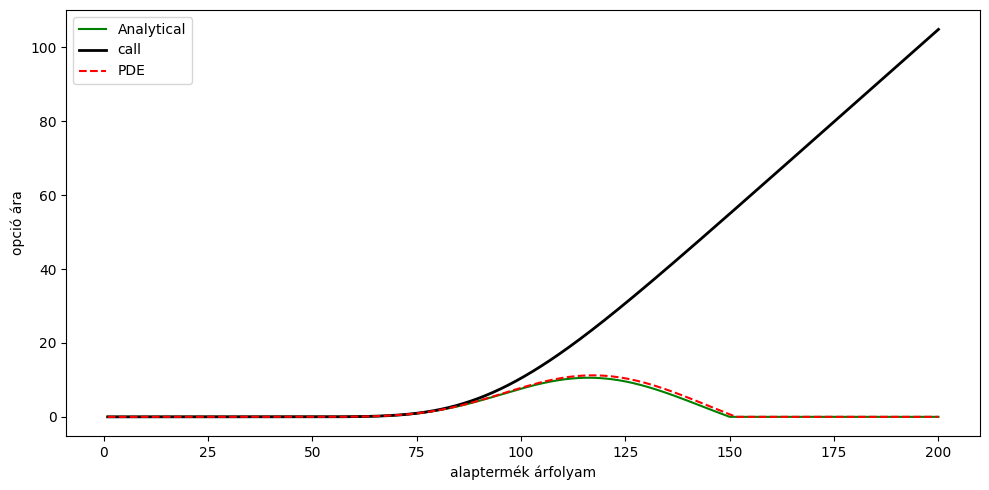

In [5]:
from pricer.analytical import BarrierUpAndOutCall, BlackScholesCall
from pricer.pde_solver import AmericanBarrierUpAndOutCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 150.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierUpAndOutCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = AmericanBarrierUpAndOutCallPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American up-and-out barrier put

100%|████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 11466.24it/s]


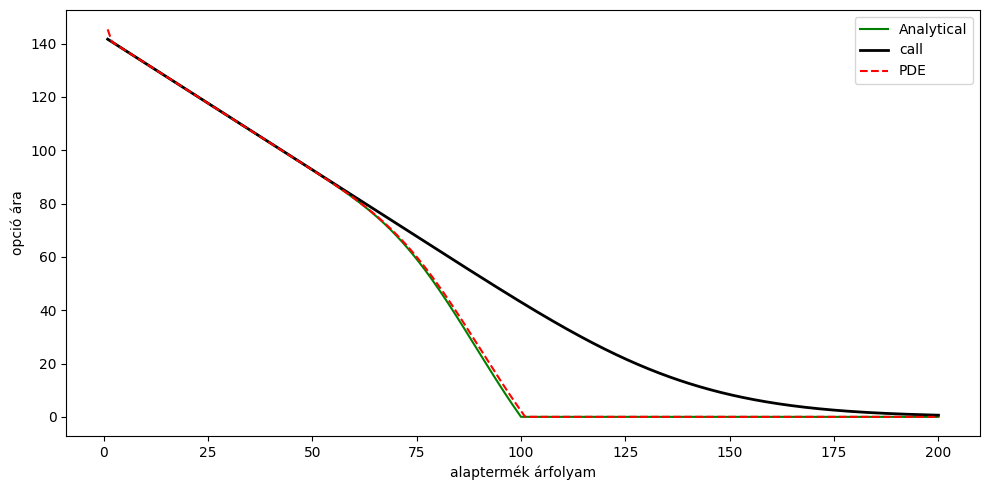

In [6]:
from pricer.analytical import BarrierUpAndOutPut, BlackScholesPut
from pricer.pde_solver import AmericanBarrierUpAndOutPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 150.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesPut(analytical_config).price()
price_analytical = BarrierUpAndOutPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = AmericanBarrierUpAndOutPutPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American up-and-in call option

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 692.39it/s]


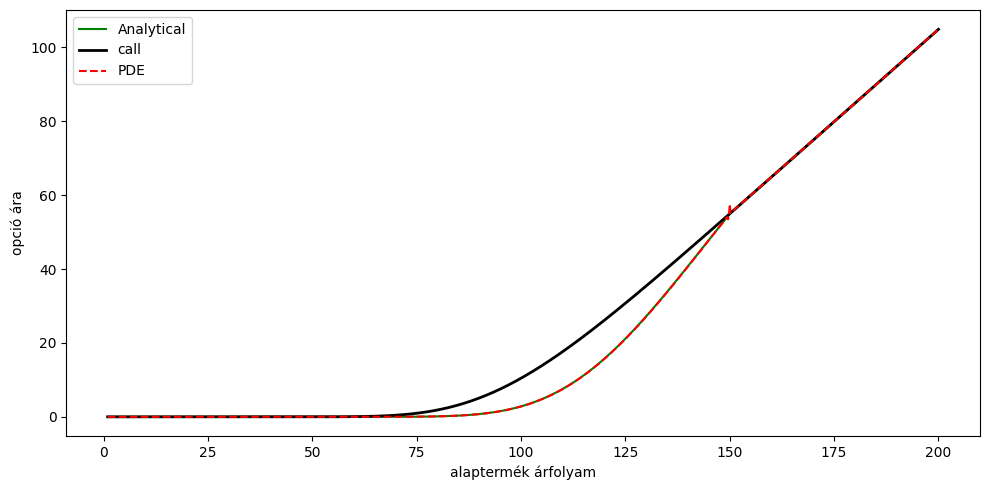

In [7]:
from pricer.analytical import BarrierUpAndInCall, BlackScholesCall
from pricer.pde_solver import AmericanBarrierUpAndInCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 100.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 150.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierUpAndInCall(analytical_config).price()

n, m = 1000, 100

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde = AmericanBarrierUpAndInCallPDE(pde_config).price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American up-and-in barrier put

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 500.71it/s]


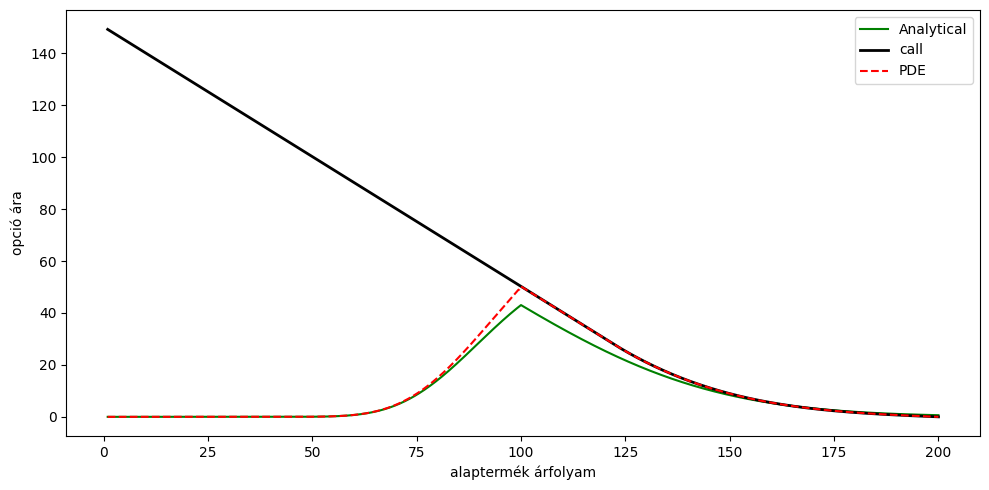

In [8]:
from pricer.analytical import BarrierUpAndInPut, BlackScholesPut
from pricer.pde_solver import AmericanBarrierUpAndInPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 150.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical = BarrierUpAndInPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_cls = AmericanBlackScholesPutPDE(pde_config)
price_cls.solve()
price_analytical_call = price_cls.price(points)

price_pde_cls = AmericanBarrierUpAndInPutPDE(pde_config)
price_pde_cls.solve()
price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American down-and-out barrier call

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [01:15<00:00,  1.31it/s]


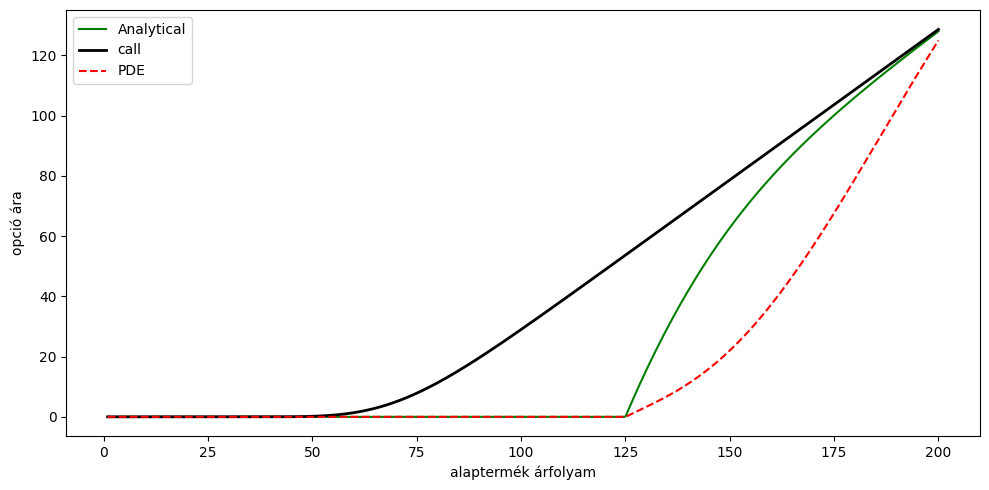

In [9]:
from pricer.analytical import BarrierDownAndOutCall, BlackScholesCall
from pricer.pde_solver import AmericanBarrierDownAndOutCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 75.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 125.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierDownAndOutCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = AmericanBarrierDownAndOutCallPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American down-and-out barrier put

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 82.49it/s]


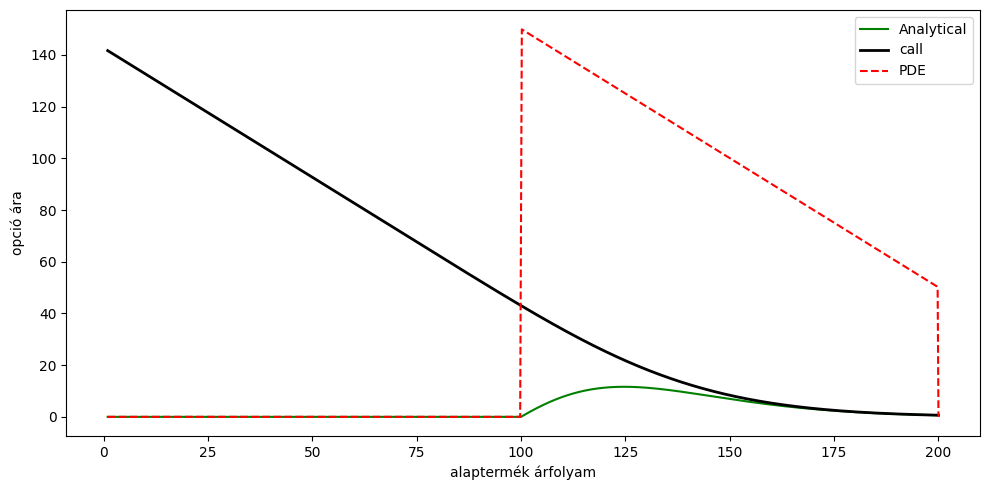

In [10]:
from pricer.analytical import BarrierDownAndOutPut, BlackScholesPut
from pricer.pde_solver import AmericanBarrierDownAndOutPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 150.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesPut(analytical_config).price()
price_analytical = BarrierDownAndOutPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde_cls = AmericanBarrierDownAndOutPutPDE(pde_config)
price_pde_cls.solve()

price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American down-and-in barrier call

C:\Users\Kristof\Desktop\MSc_Szakdolgozat\codebase\src\pricer\analytical.py:70: RuntimeWarning: divide by zero encountered in log
  np.log(self.underlier / self.strike)
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:35<00:00,  2.81it/s]


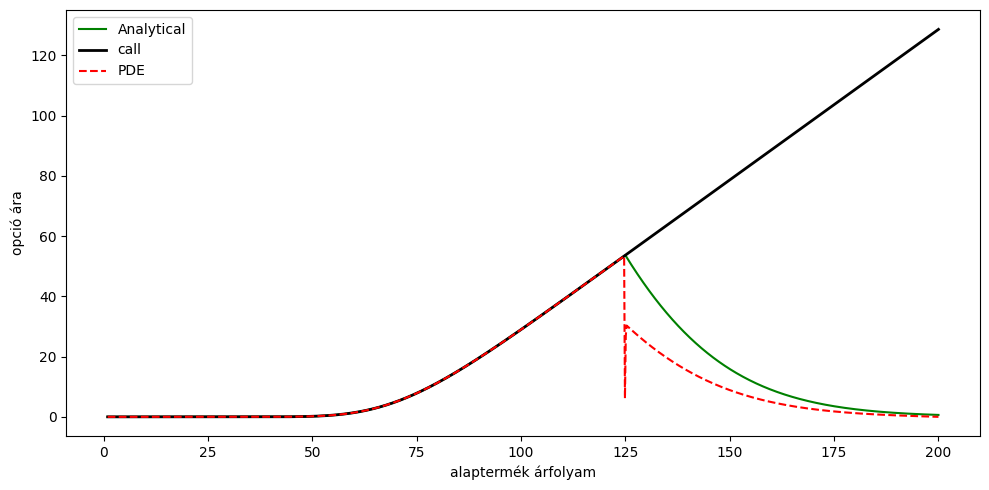

In [11]:
from pricer.analytical import BarrierDownAndInCall, BlackScholesCall
from pricer.pde_solver import AmericanBarrierDownAndInCallPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 75.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 125.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical_call = BlackScholesCall(analytical_config).price()
price_analytical = BarrierDownAndInCall(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_pde = AmericanBarrierDownAndInCallPDE(pde_config).price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()

# American down-and-in barrier put

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 106.11it/s]


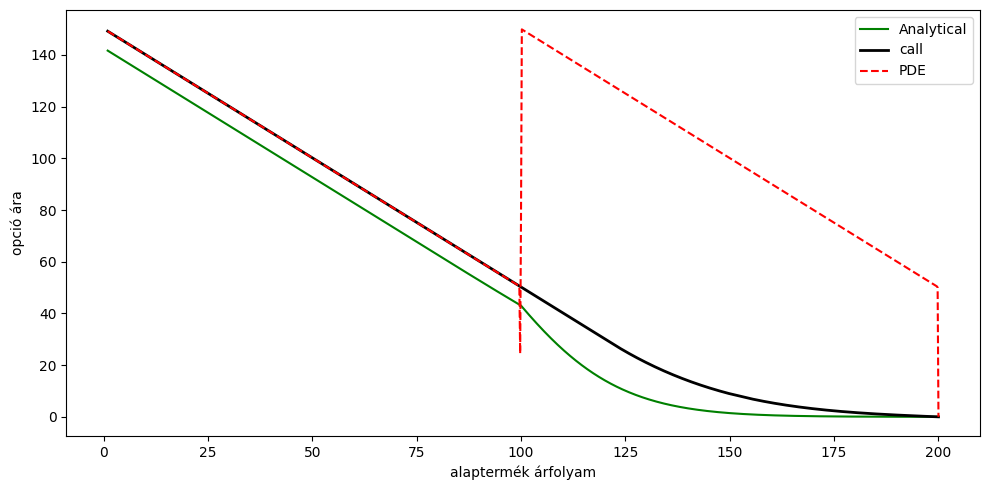

In [12]:
from pricer.analytical import BarrierDownAndInPut, BlackScholesPut
from pricer.pde_solver import AmericanBarrierDownAndInPutPDE
from pricer.config_base import BlackScholesConfig, PDESolverConfig

S = 100.0
K = 150.0
T = 1.0
r = 0.05
sigma = 0.2
barrier = 100.0

points = np.zeros((1000, 2))
points[:, 0] = np.linspace(1, 2 * S, 1000)
points[:, 1] = T

analytical_config = BlackScholesConfig(
    underlier_price=points[:, 0],
    strike=K,
    expiry=T,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_analytical = BarrierDownAndInPut(analytical_config).price()

pde_config = PDESolverConfig(
    underlier_price_grid=np.linspace(0, 2 * S, n),
    time_grid=np.linspace(0, T, m),
    strike=K,
    interest_rate=r,
    volatility=sigma,
    barrier=barrier
)

price_cls = AmericanBlackScholesPutPDE(pde_config)
price_cls.solve()
price_analytical_call = price_cls.price(points)

price_pde_cls = AmericanBarrierDownAndInPutPDE(pde_config)
price_pde_cls.solve()
price_pde = price_pde_cls.price(points)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(analytical_config.underlier_price, price_analytical, label="Analytical", color="green")
ax.plot(analytical_config.underlier_price, price_analytical_call, label="call", color="black", lw=2)
ax.plot(analytical_config.underlier_price, price_pde, label="PDE", color="red", linestyle="--")
ax.set_xlabel("alaptermék árfolyam")
ax.set_ylabel("opció ára")
ax.legend()

plt.tight_layout()
plt.show()